# Classificação de Raças

### Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib as pl
import cv2
import numpy as np

### Loading the data

In [ ]:
from zipfile import ZipFile

# ajuste o path de acordo com a localizacao do dataset
data_path = '/content/drive/MyDrive/CIS/Dog_breed_classification/data.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Caminho para a pasta com as imagens originais
base_path = "/content/data"
output_path = "stanford-dogs-dataset-split/"
train_folder = os.path.join(output_path, "train")
test_folder = os.path.join(output_path, "test")

# Criando as pastas de saída
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Iterar sobre os subdiretórios de raças
for breed in os.listdir(base_path):
    breed_path = os.path.join(base_path, breed)
    if os.path.isdir(breed_path):  # Verifica se é uma pasta
        images = [img for img in os.listdir(breed_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Divide as imagens em treino e teste (80%-20%)
        train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

        # Criando as pastas específicas para cada raça
        train_breed_folder = os.path.join(train_folder, breed)
        test_breed_folder = os.path.join(test_folder, breed)
        os.makedirs(train_breed_folder, exist_ok=True)
        os.makedirs(test_breed_folder, exist_ok=True)

        # Movendo os arquivos para treino
        for img in train_images:
            shutil.copy(os.path.join(breed_path, img), os.path.join(train_breed_folder, img))

        # Movendo os arquivos para teste
        for img in test_images:
            shutil.copy(os.path.join(breed_path, img), os.path.join(test_breed_folder, img))

In [ ]:
train_dir = os.path.join(output_path, 'train')
test_dir = os.path.join(output_path, 'test')

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# lendo o dataset de treino e teste
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                      shuffle=True,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMG_SIZE,
                                                      labels="inferred")

test_ds = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                      shuffle=True,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMG_SIZE,
                                                      labels="inferred")

Found 16418 files belonging to 120 classes.
Found 4162 files belonging to 120 classes.


### Detecting Dogs in an image

In [ ]:
from keras.applications.resnet50 import ResNet50


ResNet50_model = ResNet50(weights='imagenet')

In [ ]:
from keras.preprocessing import image
# barra de progresso
from tqdm import tqdm


# transforma uma imagem em um tensor
def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)

# transforma imagens de uma lista em uma lista de tensores
def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [ ]:
from keras.applications.resnet50 import preprocess_input, decode_predictions


def ResNet50_predict_labels(img_path):
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))

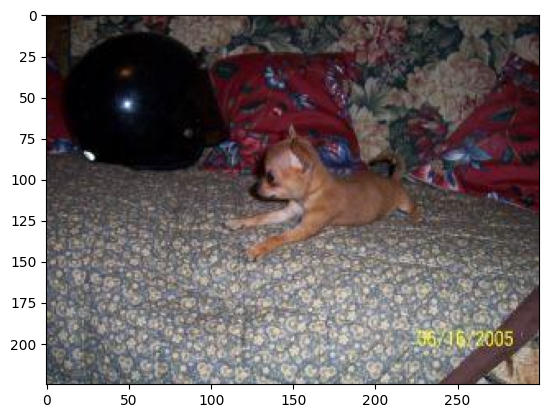

In [ ]:
import matplotlib.pyplot as plt


img_path = "/content/stanford-dogs-dataset-split/train/n02085620-Chihuahua/n02085620_6399.jpg"

img = plt.imread(img_path)
plt.imshow(img)
plt.show()

In [ ]:
# testando o detector de cachorros
dog_detector(img_path)